<a href="https://colab.research.google.com/github/Ayushi2280/Ayushi/blob/master/Kmeans_with_realtime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yahoo_fin --upgrade

In [ ]:
pip install requests_html

In [ ]:
import yahoo_fin.stock_info as si
import pandas as pd

In [ ]:
stock_list = ['ADANIPORTS.NS','ARVIND.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS','CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GILLETTE.NS', 'GOKEX.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'IBREALEST.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS',  'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',  'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS','WIPRO.NS']

In [ ]:
dow_stats = {}
for ticker in stock_list:
    temp = si.get_stats(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
    dow_stats[ticker] = temp
dow_stats

{'ADANIPORTS.NS':                            Attribute        Recent
 0                  Beta (5Y Monthly)          0.88
 1                   52-Week Change 3        61.66%
 2            S&P500 52-Week Change 3        27.77%
 3                     52 Week High 3        901.00
 4                      52 Week Low 3        427.20
 5            50-Day Moving Average 3        739.87
 6           200-Day Moving Average 3        736.49
 7                Avg Vol (3 month) 3         4.99M
 8                 Avg Vol (10 day) 3         5.73M
 9               Shares Outstanding 5         2.04B
 10      Implied Shares Outstanding 6           NaN
 11                           Float 8       737.86M
 12              % Held by Insiders 1        64.03%
 13          % Held by Institutions 1        21.76%
 14                    Shares Short 4           NaN
 15                     Short Ratio 4           NaN
 16                Short % of Float 4           NaN
 17   Short % of Shares Outstanding 4          

In [ ]:
combined_stats = pd.concat(dow_stats)
combined_stats = combined_stats.reset_index()
combined_stats

,level_0,level_1,Attribute,Recent
0,ADANIPORTS.NS,0,Beta (5Y Monthly),0.88
1,ADANIPORTS.NS,1,52-Week Change 3,61.66%
2,ADANIPORTS.NS,2,S&P500 52-Week Change 3,27.77%
3,ADANIPORTS.NS,3,52 Week High 3,901.00
4,ADANIPORTS.NS,4,52 Week Low 3,427.20
...,...,...,...,...
2698,WIPRO.NS,46,Total Debt/Equity (mrq),22.19
2699,WIPRO.NS,47,Current Ratio (mrq),2.30
2700,WIPRO.NS,48,Book Value Per Share (mrq),113.79
2701,WIPRO.NS,49,Operating Cash Flow (ttm),119.02B


In [ ]:
del combined_stats["level_1"]
# update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]
combined_stats

,Ticker,Attribute,Recent
0,ADANIPORTS.NS,Beta (5Y Monthly),0.88
1,ADANIPORTS.NS,52-Week Change 3,61.66%
2,ADANIPORTS.NS,S&P500 52-Week Change 3,27.77%
3,ADANIPORTS.NS,52 Week High 3,901.00
4,ADANIPORTS.NS,52 Week Low 3,427.20
...,...,...,...
2698,WIPRO.NS,Total Debt/Equity (mrq),22.19
2699,WIPRO.NS,Current Ratio (mrq),2.30
2700,WIPRO.NS,Book Value Per Share (mrq),113.79
2701,WIPRO.NS,Operating Cash Flow (ttm),119.02B


In [ ]:
rps = combined_stats[combined_stats["Attribute"]=="Revenue Per Share (ttm)"].reset_index()
rps

,index,Ticker,Attribute,Recent
0,36,ADANIPORTS.NS,Revenue Per Share (ttm),75.85
1,87,ARVIND.NS,Revenue Per Share (ttm),260.12
2,138,ASIANPAINT.NS,Revenue Per Share (ttm),270.20
3,189,AXISBANK.NS,Revenue Per Share (ttm),107.97
4,240,BAJAJ-AUTO.NS,Revenue Per Share (ttm),1207.09
5,291,BAJFINANCE.NS,Revenue Per Share (ttm),312.08
6,342,BAJAJFINSV.NS,Revenue Per Share (ttm),3924.38
7,393,BHARTIARTL.NS,Revenue Per Share (ttm),197.17
8,444,BPCL.NS,Revenue Per Share (ttm),1412.94
9,495,BRITANNIA.NS,Revenue Per Share (ttm),550.97


In [ ]:
del rps["index"]
del rps["Attribute"]
rps

,Ticker,Recent
0,ADANIPORTS.NS,75.85
1,ARVIND.NS,260.12
2,ASIANPAINT.NS,270.20
3,AXISBANK.NS,107.97
4,BAJAJ-AUTO.NS,1207.09
5,BAJFINANCE.NS,312.08
6,BAJAJFINSV.NS,3924.38
7,BHARTIARTL.NS,197.17
8,BPCL.NS,1412.94
9,BRITANNIA.NS,550.97


In [ ]:
# update column names
rps.columns = ["Ticker", "Revenue Per Share (ttm)"]
rps

,Ticker,Revenue Per Share (ttm)
0,ADANIPORTS.NS,75.85
1,ARVIND.NS,260.12
2,ASIANPAINT.NS,270.20
3,AXISBANK.NS,107.97
4,BAJAJ-AUTO.NS,1207.09
5,BAJFINANCE.NS,312.08
6,BAJAJFINSV.NS,3924.38
7,BHARTIARTL.NS,197.17
8,BPCL.NS,1412.94
9,BRITANNIA.NS,550.97


In [ ]:
roa = combined_stats[combined_stats["Attribute"]=="Return on Assets (ttm)"].reset_index()
roa

,index,Ticker,Attribute,Recent
0,33,ADANIPORTS.NS,Return on Assets (ttm),5.72%
1,84,ARVIND.NS,Return on Assets (ttm),4.01%
2,135,ASIANPAINT.NS,Return on Assets (ttm),13.38%
3,186,AXISBANK.NS,Return on Assets (ttm),1.01%
4,237,BAJAJ-AUTO.NS,Return on Assets (ttm),13.60%
5,288,BAJFINANCE.NS,Return on Assets (ttm),2.84%
6,339,BAJAJFINSV.NS,Return on Assets (ttm),5.41%
7,390,BHARTIARTL.NS,Return on Assets (ttm),3.66%
8,441,BPCL.NS,Return on Assets (ttm),5.90%
9,492,BRITANNIA.NS,Return on Assets (ttm),17.44%


In [ ]:
return_assets = roa["Recent"]
rps = rps.join(return_assets)
rps

,Ticker,Revenue Per Share (ttm),Recent
0,ADANIPORTS.NS,75.85,5.72%
1,ARVIND.NS,260.12,4.01%
2,ASIANPAINT.NS,270.20,13.38%
3,AXISBANK.NS,107.97,1.01%
4,BAJAJ-AUTO.NS,1207.09,13.60%
5,BAJFINANCE.NS,312.08,2.84%
6,BAJAJFINSV.NS,3924.38,5.41%
7,BHARTIARTL.NS,197.17,3.66%
8,BPCL.NS,1412.94,5.90%
9,BRITANNIA.NS,550.97,17.44%


In [ ]:
# update column names
rps.columns = ["Ticker", "Revenue Per Share (ttm)", "Return on Assets (ttm)"]
rps

,Ticker,Revenue Per Share (ttm),Return on Assets (ttm)
0,ADANIPORTS.NS,75.85,5.72%
1,ARVIND.NS,260.12,4.01%
2,ASIANPAINT.NS,270.20,13.38%
3,AXISBANK.NS,107.97,1.01%
4,BAJAJ-AUTO.NS,1207.09,13.60%
5,BAJFINANCE.NS,312.08,2.84%
6,BAJAJFINSV.NS,3924.38,5.41%
7,BHARTIARTL.NS,197.17,3.66%
8,BPCL.NS,1412.94,5.90%
9,BRITANNIA.NS,550.97,17.44%


In [ ]:
rps[["Return on Assets (ttm)"]] = rps[["Return on Assets (ttm)"]].apply(lambda x: x.str.replace('[%]','', regex=True))
rps[["Return on Assets (ttm)", "Revenue Per Share (ttm)"]] = rps[["Return on Assets (ttm)", "Revenue Per Share (ttm)"]].apply(pd.to_numeric)
rps[["Return on Assets (ttm)"]] = rps[["Return on Assets (ttm)"]].apply(lambda x: x/100)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
rps = rps.dropna()
rps

,Ticker,Revenue Per Share (ttm),Return on Assets (ttm)
0,ADANIPORTS.NS,75.85,0.0572
1,ARVIND.NS,260.12,0.0401
2,ASIANPAINT.NS,270.20,0.1338
3,AXISBANK.NS,107.97,0.0101
4,BAJAJ-AUTO.NS,1207.09,0.1360
5,BAJFINANCE.NS,312.08,0.0284
6,BAJAJFINSV.NS,3924.38,0.0541
7,BHARTIARTL.NS,197.17,0.0366
8,BPCL.NS,1412.94,0.0590
9,BRITANNIA.NS,550.97,0.1744


In [ ]:
rps.shape

(50, 3)

In [ ]:
rps.describe()

,Revenue Per Share (ttm),Return on Assets (ttm)
count,50.000000,50.000000
mean,690.378200,0.069612
std,892.617197,0.049240
min,3.520000,0.003800
25%,151.990000,0.031650
50%,310.250000,0.058900
75%,856.857500,0.096000
max,4078.910000,0.210800


In [ ]:
x = rps[['Revenue Per Share (ttm)', 'Return on Assets (ttm)']].values
distorsions = []
clusters_iterations=range(2, 50)
for k in clusters_iterations:
    k_means = KMeans(n_clusters=k)
    k_means.fit(x)
    distorsions.append(k_means.inertia_)
elbow_curve_data=pd.DataFrame(zip(clusters_iterations,distorsions),columns=['Cluster','SSE']).set_index('Cluster')
elbow_curve_data.head()

,SSE
Cluster,
2,1.174544e+07
3,3.406710e+06
4,1.895001e+06
5,9.975240e+05
6,6.191752e+05


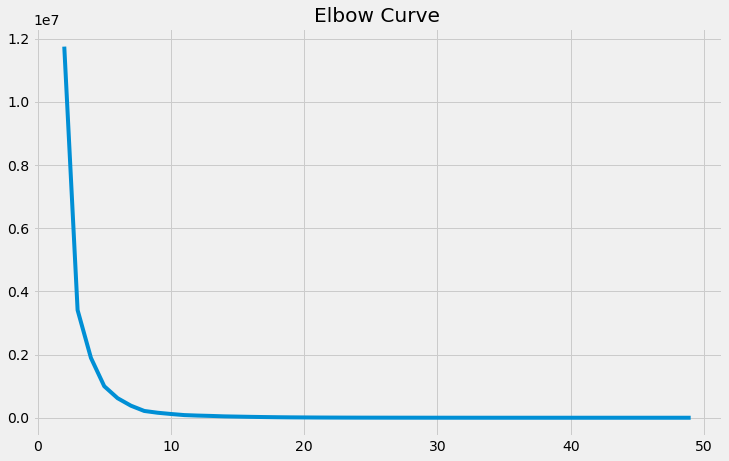

In [ ]:
# Visualize plot
plt.figure(figsize=(11,7))
plt.plot(elbow_curve_data['SSE'])
plt.title("Elbow Curve")
plt.show()

In [ ]:
pip install kneed

In [ ]:
# get elbow programmatically
from kneed import KneeLocator 
kl = KneeLocator(clusters_iterations, distorsions, curve="convex", direction="decreasing")
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

Elbow = 6


In [ ]:
import time
import requests
import numpy as np
from tqdm import tqdm
import seaborn as sns
import ipywidgets as widgets 
from scipy.stats import mstats
from datetime import datetime, timedelta
from requests.adapters import HTTPAdapter
from requests.exceptions import ConnectionError
from requests.packages.urllib3.util.retry import Retry

In [ ]:
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [ ]:
kmeans = KMeans(n_clusters=elbow).fit(x)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 2, 0, 1, 0, 2, 4, 0, 0, 0, 2, 0, 2, 0, 4, 0, 5, 4, 0,
       0, 0, 0, 0, 4, 0, 4, 0, 2, 4, 3, 0, 0, 0, 4, 0, 4, 1, 0, 4, 5, 4,
       0, 4, 0, 5, 4, 0], dtype=int32)

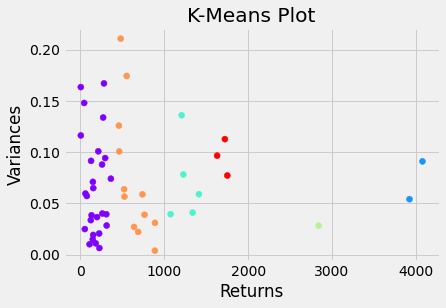

In [ ]:
plt.scatter(x[:,0], x[:,1], c = labels, cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

In [ ]:
clusters_centers_df=pd.DataFrame(kmeans.cluster_centers_,columns=['Revenue Per Share (ttm)','Return on Assets (ttm)'])
clusters_centers_df

,Revenue Per Share (ttm),Return on Assets (ttm)
0,174.462593,0.064941
1,4001.645000,0.072550
2,1251.884000,0.070720
3,2841.380000,0.028200
4,633.421667,0.076150
5,1701.090000,0.095500


In [ ]:
clustering_result=pd.DataFrame(zip(y_kmeans,rps.index),columns=['Cluster','Company'])
clustering_result.set_index('Cluster').head()

,Company
Cluster,
2,0
2,1
2,2
2,3
5,4


In [ ]:
for cluster_num in list(clustering_result.set_index('Cluster').index.unique()):
    print(clustering_result.set_index('Cluster').loc[cluster_num].head())

         Company
Cluster         
2              0
2              1
2              2
2              3
2              5
         Company
Cluster         
5              4
5              8
5             13
5             17
5             32
         Company
Cluster         
4              6
4             42
         Company
Cluster         
0              9
0             19
0             22
0             28
0             30
         Company
Cluster         
3             21
3             45
3             50
Company    34
Name: 1, dtype: int64


In [ ]:
# Enrich Centers Df with the number of elements by Cluster
clusters_centers_df['Count']=clustering_result['Cluster'].value_counts().to_frame().rename(columns={'Cluster':'Count'})['Count']
clusters_centers_df.head()

,Revenue Per Share (ttm),Return on Assets (ttm),Count
0,174.462593,0.064941,12
1,4001.645000,0.072550,1
2,1251.884000,0.070720,27
3,2841.380000,0.028200,3
4,633.421667,0.076150,2


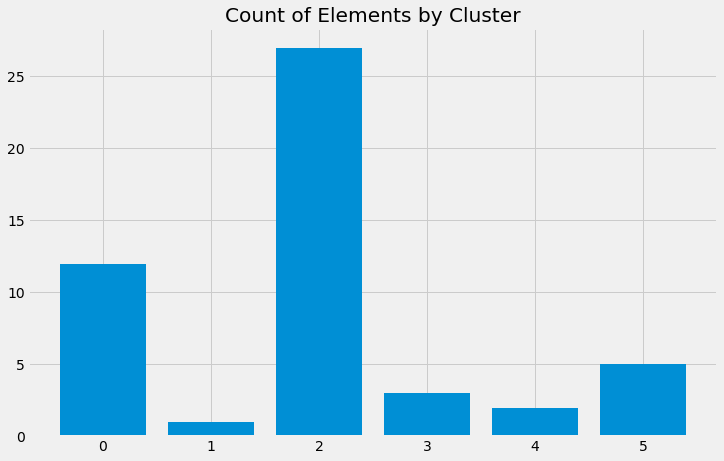

In [ ]:
# Visualize Count of Elements by Cluster 
plt.figure(figsize=(11,7))
plt.bar(clusters_centers_df.index.values,clusters_centers_df['Count'])
plt.title("Count of Elements by Cluster")
plt.show()

https://medium.com/analytics-vidhya/machine-learning-used-to-build-a-diversified-portfolio-k-means-clustering-ee91cb9ae59e

https://algotrading101.com/learn/yahoo-finance-api-guide/